In [1]:
# Imports y setup

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid")
from scipy import stats
sns.plt = plt
np.random.seed(1) # No estoy seguro si es necesario
df = pd.read_csv('tiempos.txt', sep=' ')

In [2]:
# Estadisticas basicas
print(df.describe())

# El Dataset
print(df.to_string(index=False))


          Atleta  tiempo_sol  tiempo_nublado  tiempo_lluvia
count  12.000000   12.000000       12.000000      12.000000
mean    6.500000   13.908333       13.866667      33.158333
std     3.605551    2.025949        1.789024      49.079332
min     1.000000   11.000000       11.300000      18.200000
25%     3.750000   12.150000       12.475000      18.775000
50%     6.500000   14.400000       14.100000      19.050000
75%     9.250000   15.350000       14.950000      19.250000
max    12.000000   17.000000       16.700000     189.000000
Atleta  tiempo_sol  tiempo_nublado  tiempo_lluvia
     1        11.1            11.3           19.4
     2        13.0            12.8           18.2
     3        16.1            16.0           19.0
     4        14.5            14.1           18.9
     5        12.0            12.5           19.1
     6        11.0            11.6           18.7
     7        15.1            14.6          189.0
     8        14.4            14.2           19.9
     9    

/home/brian/Documents/facultad/cienciadatos/venv/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


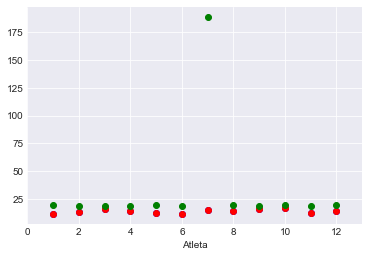

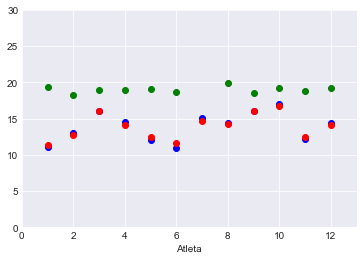

In [3]:
sns.tsplot(time=df['Atleta'], data=df['tiempo_sol'], interpolate=False, color="blue")
sns.tsplot(time=df['Atleta'], data=df['tiempo_nublado'], interpolate=False, color="red")
sns.tsplot(time=df['Atleta'], data=df['tiempo_lluvia'], interpolate=False, color="green")
plt.show()

sns.tsplot(time=df['Atleta'], data=df['tiempo_sol'], interpolate=False, color="blue")
sns.tsplot(time=df['Atleta'], data=df['tiempo_nublado'], interpolate=False, color="red")
sns.tsplot(time=df['Atleta'], data=df['tiempo_lluvia'], interpolate=False, color="green")
LLUVIA_LIMIT = 30
plt.ylim((0,LLUVIA_LIMIT))
plt.show()

# Vemos que hay un valor de tiempo de atleta en lluvia '189' que tomamos como outlier por la 
# diferencia marcada con el resto de los datos. Lo filtramos y guardamos la nueva lista:


df_filtrado = df[df['tiempo_lluvia'] < LLUVIA_LIMIT]

In [4]:
def permutation_test_flip(data1, data2, func):
    assert(len(data1) == len(data2))
    size = len(data1)
    deltas = []
    for i in range(2**size):
        copy1 = list(data1)
        copy2 = list(data2)
        bin_i = "{0:b}".format(i)
        bin_i = ['0' for j in range(size - len(bin_i))] + list(bin_i)
        for j, digit in enumerate(bin_i):
            if int(digit):
                copy1[j], copy2[j] = copy2[j], copy1[j]
        deltas.append(np.average(copy1) - np.average(copy2))
    print
    delta_0 = np.average(data1) - np.average(data2)

    reject_delta_count = len(filter(lambda x: func(x) >= delta_0, deltas))
    print("----------- Test de Permutacion -----------")
    print("Delta 0: "+ str(delta_0))
    print("Max deltas: "+ str(max(deltas)))
    print("Cantidad mayores a delta 0: "+ str(reject_delta_count) + " de " + str(len(deltas)))
    print("Propoción de rechazados: "+ str(float(reject_delta_count)/(2**len(data1)))) 
    print("-------------------------------------------")
    return deltas

In [27]:
# Asumimos que la habilidad de un atleta sigue una distribucion normal en la poblacion
# Es razonable asumir que todos los datos tienen distribucion normal

# Hacemos un test de normalidad de nuestros datos

print stats.shapiro(df['tiempo_sol'])
print stats.shapiro(df['tiempo_nublado'])
print stats.shapiro(df_filtrado['tiempo_lluvia'])

# No podemos rechazar que los datos vengan de distribuciones normales

(0.9382138848304749, 0.47528600692749023)
(0.9423919916152954, 0.5296684503555298)
(0.9852456450462341, 0.9883151054382324)


In [16]:
# 1) ¿Los atletas son mas lentos en dias de lluvia?


----------- Test de Permutacion -----------
Delta 0: 5.19090909091
Max deltas: 5.19090909091
Cantidad mayores a delta 0: 1 de 2048
Propoción de rechazados: 0.00048828125
-------------------------------------------


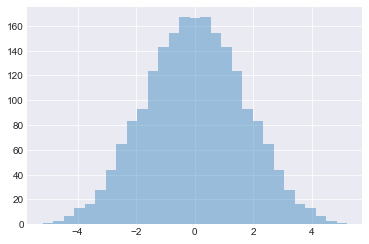

In [6]:
# Utilizamos un test de permutaciones. Como las muestran estan apareadas por el corredor,
# las permutaciones consisten en invertir el orden de las muestras de corredores determinados


deltas = permutation_test_flip(df_filtrado['tiempo_lluvia'],df_filtrado['tiempo_sol'],(lambda x: x) )
sns.distplot(deltas, kde=False, rug=False)
sns.plt.show()

# El p-valor computado nos dice la probabilidad de que el delta entre las medias sea igual al delta0 o mayor.
# El p-valor da muy muy bajo (todas las muestras de lluvia son mayores que las de sol)

# Podemos rechazar la hipotesis nula de que ambas muestras vienen tienen la misma media.


# Respuesta: Tenemos suficiente informacion para afirmar que los atletas son mas lentos en dias de lluvia

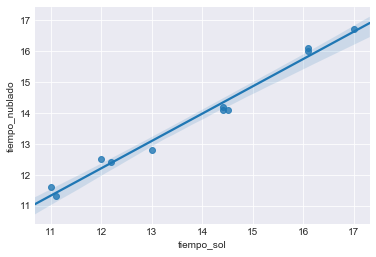

In [7]:
# 2) Pregunta: ¿El cielo nublado no influye en los tiempos de los atletas?

# Cuando esta nublado, los datos varian de forma similar a cuando hay sol

sns.regplot(x=df_filtrado['tiempo_sol'], y=df_filtrado['tiempo_nublado'])
sns.plt.show()


In [17]:
# Tenemos evidencia de una correlacion lineal alta entre los datos de cielo nublado y soleado

print(stats.pearsonr(df_filtrado['tiempo_sol'],df_filtrado['tiempo_nublado']))


(0.99224199979513195, 1.8469595486418115e-09)


In [21]:
print stats.bartlett(df_filtrado['tiempo_sol'], df_filtrado['tiempo_nublado'])
# No podemos rechazar que tengan la misma varianza
# Creemos que si la tienen

# T-Test con variables emparentadas con hipotesis nula "Tienen misma media"

print(stats.ttest_rel(df_filtrado['tiempo_sol'],df_filtrado['tiempo_nublado']))

# No podemos rechazar que tengan la misma media

BartlettResult(statistic=0.1263588326837452, pvalue=0.72223760876724175)
Ttest_relResult(statistic=1.600386423731163e-15, pvalue=0.99999999999999878)



----------- Test de Permutacion -----------
Delta 0: 0.0416666666667
Max deltas: 0.291666666667
Cantidad mayores a delta 0: 2820 de 4096
Propoción de rechazados: 0.6884765625
-------------------------------------------


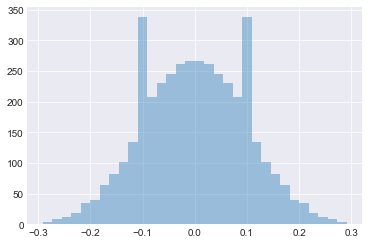

In [11]:
# Aqui tambien podemos utilizar un test de permutaciones con "flips"
# Para ver la probabilidad de ver resultados tan o mas extremos
# Dada la hipotesiis de que ambos vienen de la misma media

# Usamos df ya que no necesitamos descartar los datos del atleta outlier

deltas = permutation_test_flip(df['tiempo_sol'],df['tiempo_nublado'],(lambda x: abs(x)))
sns.distplot(deltas, kde=False, rug=False)
sns.plt.show()

# No podemos rechazar la hipotesis de que tengan la misma media

# Respuesta: No tenemos suficiente informacion para decir afirmar que 
# "El cielo nublado no influye en los tiempos de los atletas"
# Creemos que si por lo que vemos en los graficos

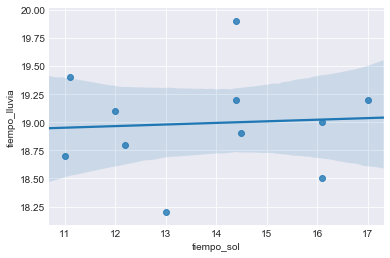

In [12]:
# 3) La velocidad en dı́as de lluvia es independiente del atleta.

# Es razonable suponer que el tiempo que tarda un corredor es una buena medida de su habilidad
# Y que esta habilidad a su vez se relaciona tambien con su habilidad en la lluvia
# Si es que las mediciones en lluvia son dependientes de esta.

sns.regplot(x=df_filtrado['tiempo_sol'], y=df_filtrado['tiempo_lluvia'])
sns.plt.show()

In [13]:
print(stats.pearsonr(df_filtrado['tiempo_sol'],df_filtrado['tiempo_lluvia']))
# No tenemos evidencia de correlacion lineal entre tiempo de lluvia y tiempo soleado

(0.064963553876733887, 0.84949358072453474)


In [14]:
print stats.bartlett(df_filtrado['tiempo_sol'], df_filtrado['tiempo_lluvia'])
# Con este test podemos concluir que el los tiempos de sol y tiempos de lluvia tienen varianzas distintas
# Mas aun, podemos decir que la varianza de sol es mayor
# Esto es consistente con la hipotesis de que los tiempos en lluvia son independientes del atleta, pues varian menos


# Creemos que no podemos cuantificar en un test si las muestras son independientes del atleta o no
# Si tuviesemos varias mediciones por atleta podriamos comparar las 
# mediciones de dos atletas con la hipotesis de que tienen la misma media

# Respuesta: No tenemos suficiente informacion para decir que 
# "La velocidad en dı́as de lluvia es independiente del atleta"
# Pero creemos que si

BartlettResult(statistic=16.625129578948425, pvalue=4.5543575568424302e-05)


In [24]:
# 4) El clima influye en la velocidad de los atletas.

# Si asumimos que los datos vienen de una distribucion de misma varianza, podria utilizar el test f_oneway (ANOVA)
print(stats.f_oneway(df_filtrado['tiempo_sol'],df_filtrado['tiempo_nublado'], df_filtrado['tiempo_lluvia']))

# Tenemos suficiente evidencia para rechazar la hipotesis nula de que las medias son iguales. 
# Es decir que concluimos que las medias para tiempo soleado, tiempo nublado y tiempo de lluvia son distintas.

# Notar que utilizamos un test que no utiliza la hipotesis de que apareamiento entre los dias.
# Es decir, no importó que hayamos tomado muestras de soleado nublado y lluvia para mismos corredores.
# Aun asi, tuvimos suficiente evidencia para rechazar la hipotesis nula

F_onewayResult(statistic=36.907516413855539, pvalue=8.1830487111034126e-09)


In [28]:
# ¿Sirve entrenar en dias de lluvia?

# Tenemos que definir que signfifica para nosotros que sirva


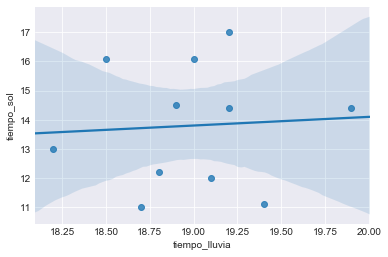

In [29]:
# Podemos creer que aquellos que alcanzaron un mejor rendimiento en la lluvia, 
# alcanzan un mejor rendimiento en tiempo soleado

sns.regplot(x=df_filtrado['tiempo_lluvia'], y=df_filtrado['tiempo_sol'])
sns.plt.show()

# Graficamente vemos que esto no ocurre. Mas aun, dado que creemos que los tiempose en lluvia  
# son independientes del atleta, estos tiempos no nos aportan informacion

In [30]:
# La correlacion lineal es muy baja si comparamos los dias que llueve a los dias soleados
# (No hay evidencia de no correlacion)

print(stats.pearsonr(df_filtrado['tiempo_lluvia'],df_filtrado['tiempo_sol']))


(0.064963553876733887, 0.84949358072453474)


In [ ]:
# ¿Que le recomendariamos al entrenador?

